<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2023-03-24 18:05:26--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.1’

m4_survey_data.sqli 100%[===================>]  34.98M  30.6MB/s    in 1.1s    

2023-03-24 18:05:28 (30.6 MB/s) - ‘m4_survey_data.sqlite.1’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [53]:
table_name = 'DatabaseWorkedWith'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "DatabaseWorkedWith" (
"Respondent" INTEGER,
  "DatabaseWorkedWith" TEXT
)


# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


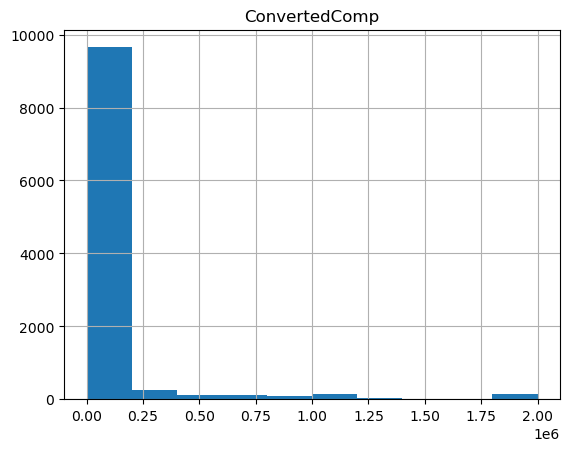

In [8]:
# your code goes here

import pandas as pd
import matplotlib.pyplot as plt
QUERY = """
SELECT ConvertedComp
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
df.hist()
plt.show()

### Box Plots


Plot a box plot of `Age.`


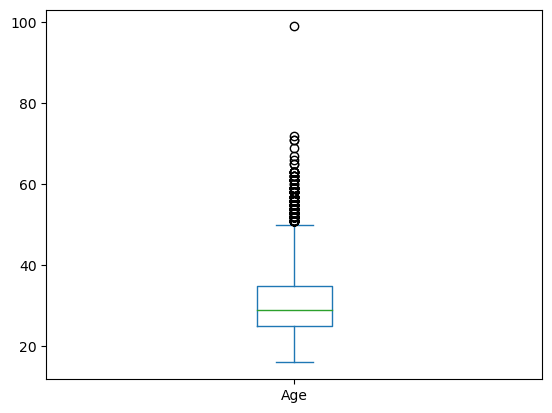

In [9]:
# your code goes here
# your code goes here

import pandas as pd
import matplotlib.pyplot as plt
QUERY = """
SELECT Age
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
df.plot.box()
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


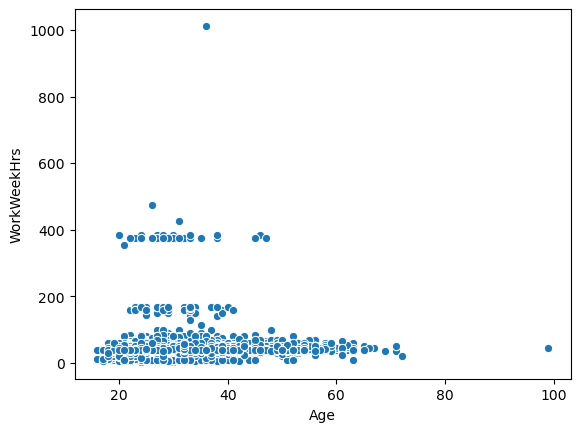

In [11]:
# your code goes here
import seaborn as sns 
QUERY1 = """
SELECT *
FROM master
"""
df = pd.read_sql_query(QUERY1,conn)
sns.scatterplot(x=df['Age'], y=df['WorkWeekHrs'])

# !!!!!!!!!!!!!!!!!!
# df.plot.scatter(x=df['Age'], y=df['WorkWeekHrs'])
plt.show()



### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


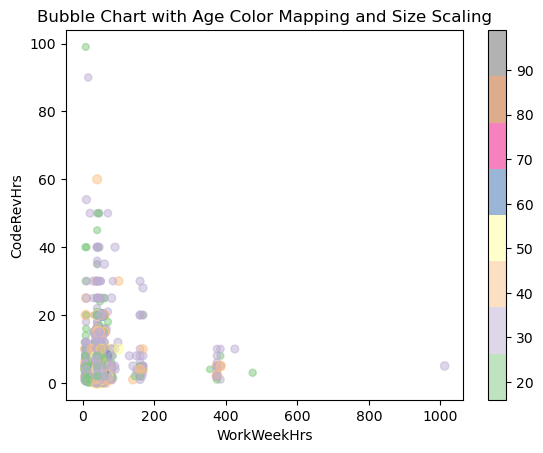

In [52]:
# your code goes here
plt.scatter(df['WorkWeekHrs'], df['CodeRevHrs'], s=df['Age'], alpha=0.5, c=df['Age'], cmap='Accent')
plt.colorbar()
plt.title('Bubble Chart with Age Color Mapping and Size Scaling')
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')

plt.show()


# sns.scatterplot(x = "WorkWeekHrs", y= "CodeRevHrs", size= "Age", hue = "Age", data = df, sizes = (100, 200), alpha = .5)




## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


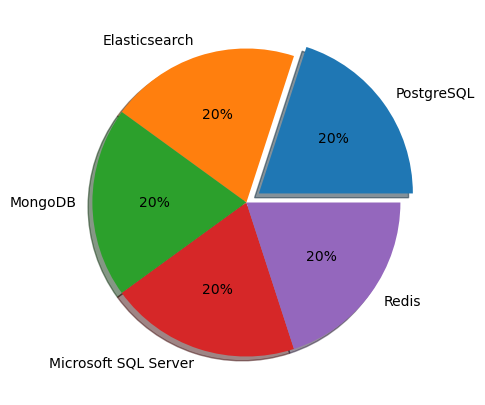

In [13]:
# your code goes here
Query2 = """
SELECT * FROM DatabaseDesireNextYear
ORDER BY Respondent DESC
LIMIT 5
"""

df2 = pd.read_sql_query(Query2, conn)
df2

fig = plt.figure(figsize =(7, 5))
plt.pie(df2['Respondent'],explode=[0.1,0,0,0,0], labels = df2["DatabaseDesireNextYear"], autopct= "%1.000f%%", shadow=True)
plt.show()

In [21]:
Query3 = """
SELECT * FROM DatabaseDesireNextYear
"""

df3 = pd.read_sql_query(Query3, conn)
# df3.head()

df4 = df3['DatabaseDesireNextYear'].value_counts().to_frame()
df4 = df4.reset_index()
df4.columns = ["Database", "DatabaseDesireNextYear"]
df4.rename(columns= {"database": "DataBase"}, inplace= True)

df4 = df4.head()
df4




,Database,DatabaseDesireNextYear
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856


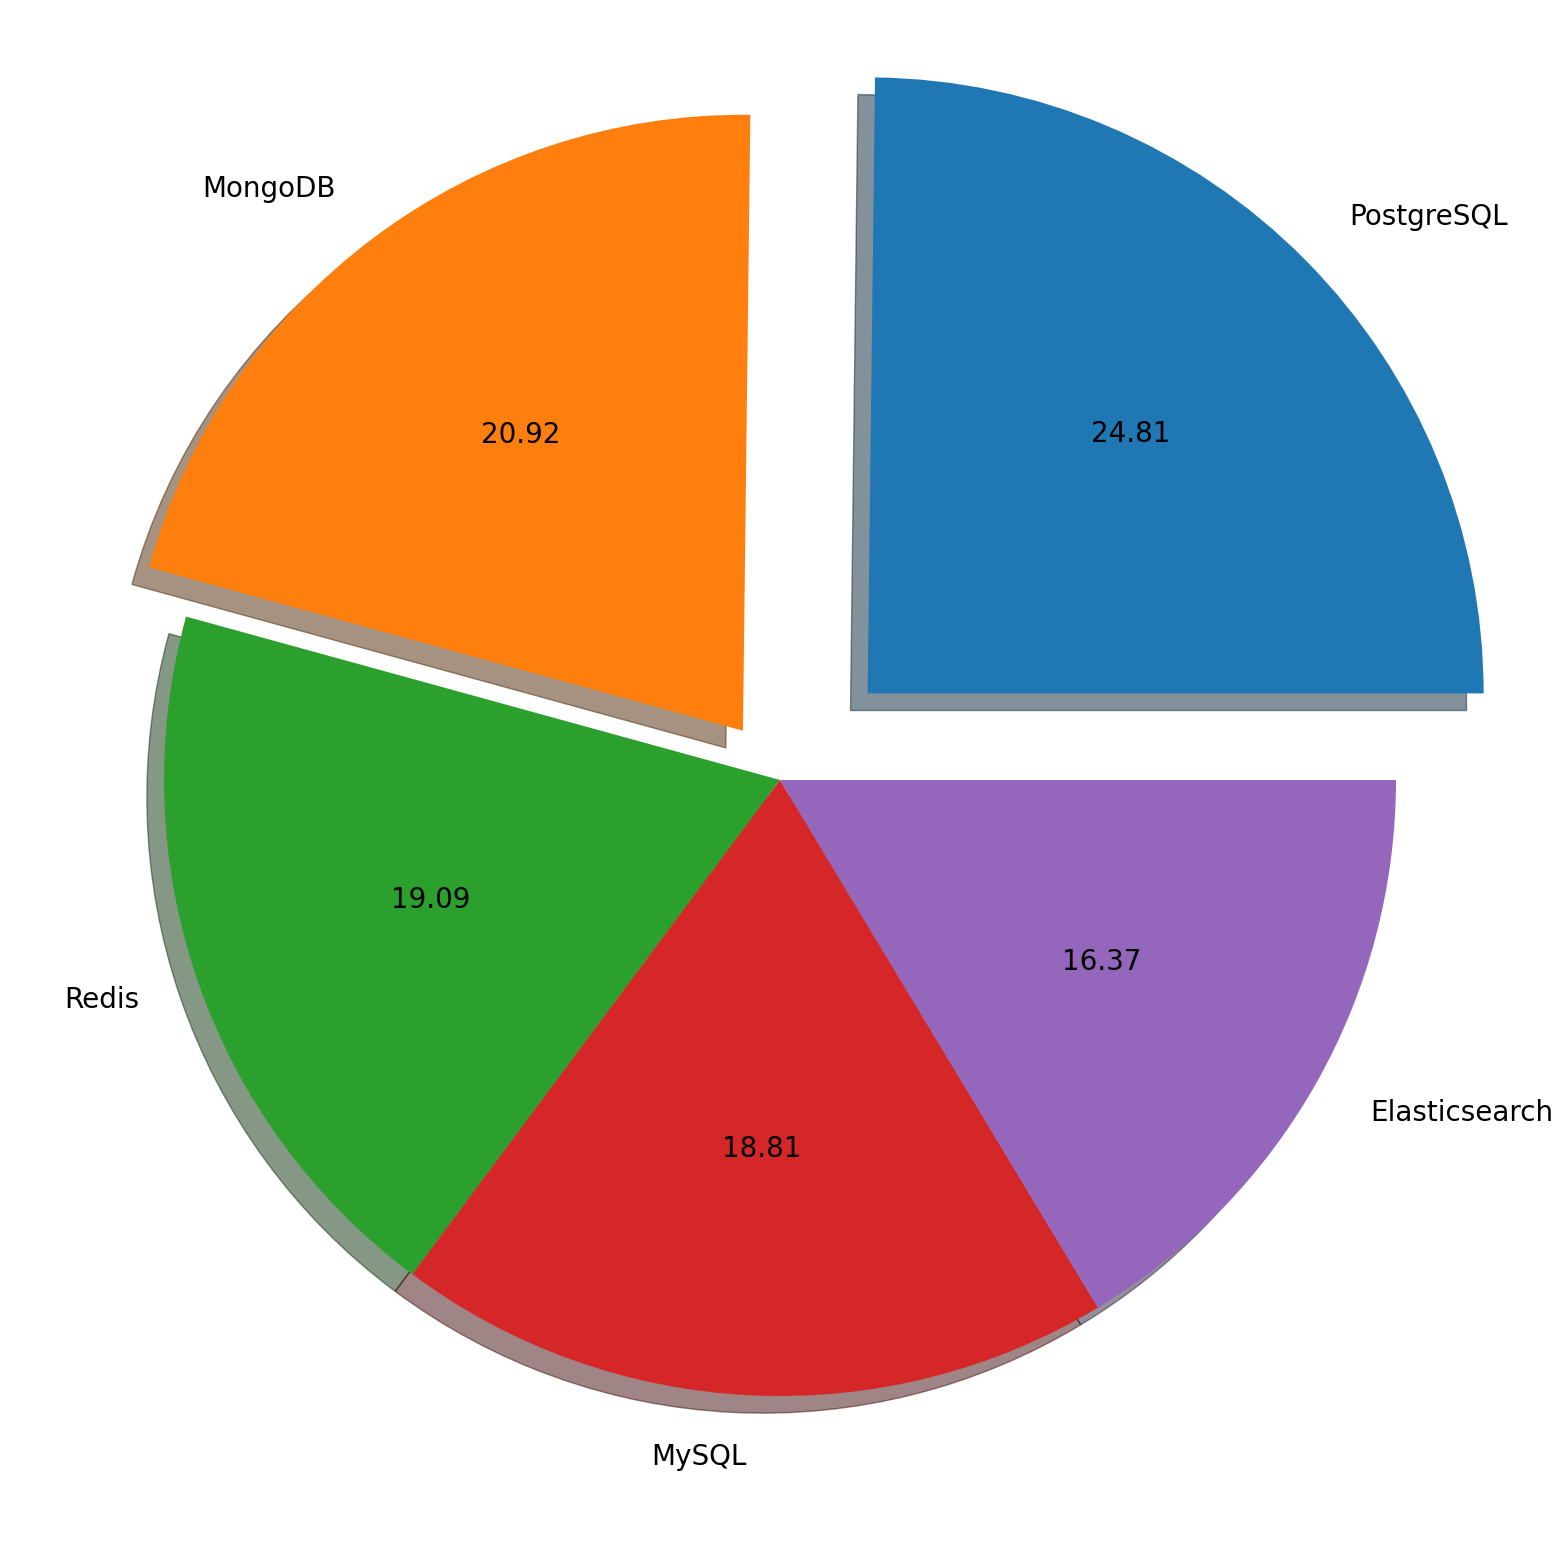

In [26]:
plt.figure(figsize= (20, 20))
plt.pie(x = df4["DatabaseDesireNextYear"], labels= df4['Database'],explode=[0.2,0.1,0,0,0],shadow=True ,autopct= "%.2f", textprops= {'fontsize': 20})
plt.show()

In [52]:
Query3 = """
SELECT * FROM DatabaseWorkedWith
"""

df3 = pd.read_sql_query(Query3, conn)
# df3.head()

df4 = df3['DatabaseWorkedWith'].value_counts().to_frame()
df4 = df4.reset_index()
df4.columns = ["Database", "DatabaseWorkedWith"]
df4.rename(columns= {"database": "DataBase"}, inplace= True)

df4 = df4.head()
df4




,Database,DatabaseWorkedWith
0,MySQL,5469
1,Microsoft SQL Server,4110
2,PostgreSQL,4097
3,SQLite,3248
4,MongoDB,3016


In [51]:
Query3 = """
SELECT * FROM LanguageDesireNextYear
"""

df3 = pd.read_sql_query(Query3, conn)
# df3.head()

df4 = df3['LanguageDesireNextYear'].value_counts().to_frame()
df4 = df4.reset_index()
df4.columns = ["Language", "LanguageDesireNextYear"]
df4.rename(columns= {"language": "Language"}, inplace= True)

df4 = df4.head()
df4




,Language,LanguageDesireNextYear
0,JavaScript,6630
1,HTML/CSS,5328
2,Python,5239
3,SQL,5012
4,TypeScript,4088


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


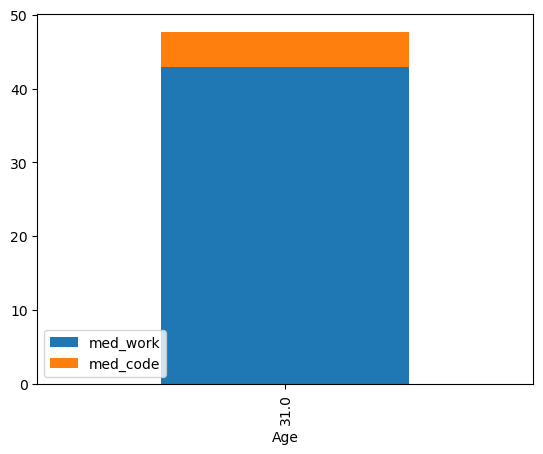

In [42]:
# your code goes here
Q5= """
select Age, AVG(WorkWeekHrs) as med_work, AVG(CodeRevHrs) as med_code
from master
where age between 30 and 35
"""
df= pd.read_sql_query(Q5, conn)
df.plot(kind='bar', x='Age', stacked=True)
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [59]:
# your code goes here
query = '''
SELECT Age, AVG(ConvertedComp) AS Median_ConvertedComp
FROM master
WHERE Age BETWEEN 45 AND 60
GROUP BY Age
ORDER BY Age
'''
df = pd.read_sql_query(query, conn)


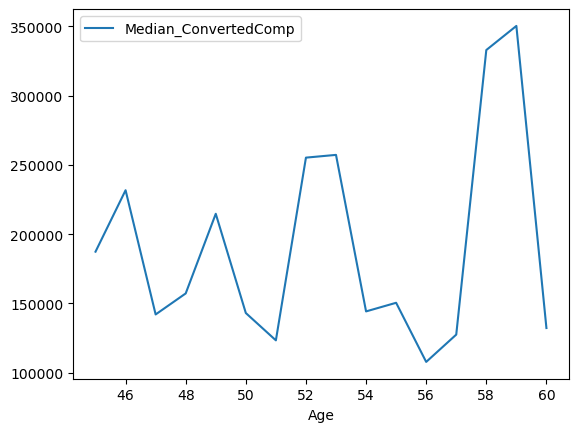

In [60]:
df.plot(kind='line', x='Age', y='Median_ConvertedComp')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


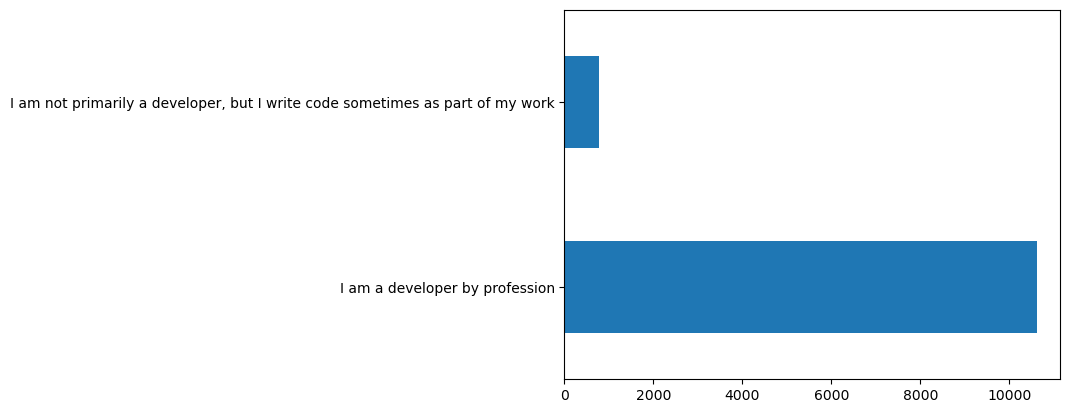

In [50]:
# your code goes here
q = """
select * from master
"""
df = pd.read_sql_query(q,conn)
df1 = df['MainBranch'].value_counts()
df1.plot(kind='barh')
plt.show()

Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
